In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [4]:
df=pd.read_csv("/content/Titanic_train.csv",index_col='PassengerId')

In [5]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [14]:
df

,Survived,Pclass,Sex,Age
PassengerId,,,,
1,0,3,male,22.0
2,1,1,female,38.0
3,1,3,female,26.0
4,1,1,female,35.0
5,0,3,male,35.0
...,...,...,...,...
886,0,3,female,39.0
887,0,2,male,27.0
888,1,1,female,19.0


In [6]:
df.drop(['SibSp','Parch','Ticket','Fare','Cabin','Embarked','Name'],inplace=True,axis = 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 34.8+ KB


In [21]:
df=pd.get_dummies(df,'Sex')

In [9]:
df=df.dropna()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 1 to 891
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    714 non-null    int64  
 1   Pclass      714 non-null    int64  
 2   Age         714 non-null    float64
 3   Sex_female  714 non-null    bool   
 4   Sex_male    714 non-null    bool   
dtypes: bool(2), float64(1), int64(2)
memory usage: 23.7 KB


In [24]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [25]:
Y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
886    0
887    0
888    1
890    1
891    0
Name: Survived, Length: 714, dtype: int64

In [26]:
X

,Pclass,Age,Sex_female,Sex_male
PassengerId,,,,
1,3,22.0,False,True
2,1,38.0,True,False
3,3,26.0,True,False
4,1,35.0,True,False
5,3,35.0,False,True
...,...,...,...,...
886,3,39.0,True,False
887,2,27.0,False,True
888,1,19.0,True,False


In [27]:
model=LogisticRegression()
model.fit(X,Y)

LogisticRegression()

In [28]:
Y_pred=model.predict(X)

In [29]:
Y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,Y_pred)
print(confusion_matrix)

[[356  68]
 [ 83 207]]


In [33]:
accuracy=((356+207)/(356+68+83+207))*100
accuracy

78.8515406162465

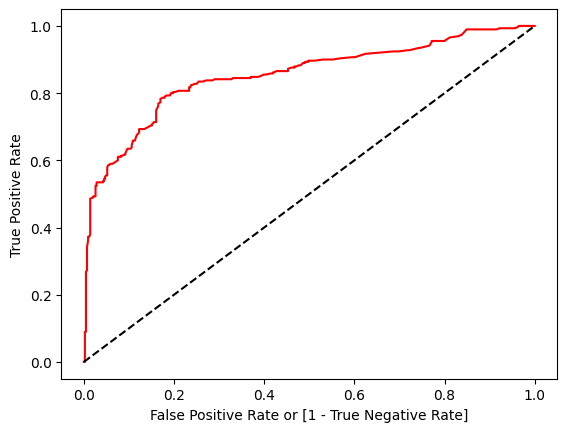

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, model.predict_proba(X)[:,1:])

auc = roc_auc_score(Y, Y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], 'k--')# x axis range is 0 to 1, y axis range is 0 to 1, k-- is a line type - dotted
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show() # red one is roc curve

In [37]:
auc

0.7767078724788549